In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.5.0'

In [2]:
keras.__version__

'2.5.0'

# Implementando uma Rede MLP com Keras

## Construindo um Classificador

### Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print(X_train_full.shape)
print(X_train_full.dtype)
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

(60000, 28, 28)
uint8


### Criando o Modelo

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden1 = model.layers[1]
hidden2 = model.layers[2]
print(hidden2.name)
model.get_layer('dense') is hidden1

dense_1


True

In [15]:
weights, biases = hidden1.get_weights()
print(weights.shape, biases.shape)

(784, 300) (300,)


### Treinando e Avaliando o modelo
- O parâmetro <span style='font-family:monospace;'>class_weight</span> pode ser útil quando as classes estão desbalanceadas. Também há a possibilidade de dar peso para as amostras: <span style='font-family:monospace;'>sample_weight</span>

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7372 - accuracy: 0.7566 - val_loss: 0.5383 - val_accuracy: 0.8106
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4940 - accuracy: 0.8283 - val_loss: 0.4684 - val_accuracy: 0.8332
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4497 - accuracy: 0.8429 - val_loss: 0.4252 - val_accuracy: 0.8552
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4208 - accuracy: 0.8528 - val_loss: 0.3967 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4012 - accuracy: 0.8595 - val_loss: 0.3943 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3855 - accuracy: 0.8644 - val_loss: 0.3891 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3729 - accuracy: 0.8683 - val_loss: 0.3700 - val_accuracy:

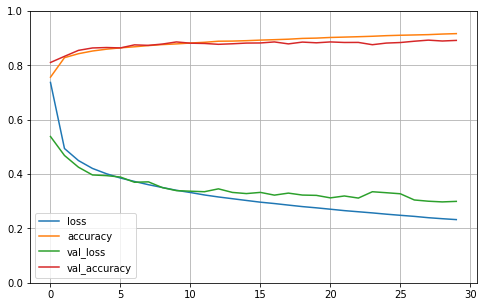

313/313 [==============================] - 1s 1ms/step - loss: 63.3460 - accuracy: 0.8472


[63.34597396850586, 0.8471999764442444]

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

hist = pd.DataFrame(history.history)
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
model.evaluate(X_test, y_test)

In [42]:
import numpy as np
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = model.predict_classes(X_new)
y_pred = np.array(class_names)[y_pred]
print(y_proba.round(2))
print(y_pred)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Ankle boot' 'Pullover' 'Trouser']


## Construindo um Regressor

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]), # Só uma camada para não ter overfitting
    keras.layers.Dense(1) # pq os dados são mais ruidosos do que o dataset anterior
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0156 - val_loss: 0.6403
Epoch 2/20
363/363 [==============================] - 0s 944us/step - loss: 1.0171 - val_loss: 0.5253
Epoch 3/20
363/363 [==============================] - 0s 914us/step - loss: 0.5120 - val_loss: 0.4787
Epoch 4/20
363/363 [==============================] - 0s 911us/step - loss: 0.4773 - val_loss: 0.4538
Epoch 5/20
363/363 [==============================] - 0s 967us/step - loss: 0.4581 - val_loss: 0.4343
Epoch 6/20
363/363 [==============================] - 0s 940us/step - loss: 0.4458 - val_loss: 0.4236
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4360 - val_loss: 0.4148
Epoch 8/20
363/363 [==============================] - 0s 962us/step - loss: 0.4277 - val_loss: 0.4098
Epoch 9/20
363/363 [==============================] - 0s 892us/step - loss: 0.4305 - val_loss: 0.4141
Epoch 10/20
363/363 [==============================] - 0s 921us/step - loss: 0.4203 - 

In [55]:
y_pred = model.predict(X_new)
print(y_pred.flatten(), y_test[:3])

[0.922597 2.244314 1.633507] [0.819 2.473 1.777]


## Modelos Complexos: API Funcional

### Modelo com Atalho, Divisão da Entrada e Múltiplas Saídas

In [18]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [19]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.6709 - main_output_loss: 2.4922 - aux_output_loss: 4.2801 - val_loss: 1.3483 - val_main_output_loss: 1.1079 - val_aux_output_loss: 3.5115
Epoch 2/20
363/363 [==============================] - 0s 893us/step - loss: 1.1081 - main_output_loss: 0.9040 - aux_output_loss: 2.9455 - val_loss: 0.9638 - val_main_output_loss: 0.8015 - val_aux_output_loss: 2.4247
Epoch 3/20
363/363 [==============================] - 0s 950us/step - loss: 0.8714 - main_output_loss: 0.7276 - aux_output_loss: 2.1649 - val_loss: 0.8236 - val_main_output_loss: 0.7047 - val_aux_output_loss: 1.8937
Epoch 4/20
363/363 [==============================] - 0s 951us/step - loss: 0.7740 - main_output_loss: 0.6632 - aux_output_loss: 1.7706 - val_loss: 0.7548 - val_main_output_loss: 0.6583 - val_aux_output_loss: 1.6232
Epoch 5/20
363/363 [==============================] - 0s 980us/step - loss: 0.7201 - main_output_loss: 0.6257 - aux_output_loss: 1.5698 - 

## Usando a API de Subclasse: Modelos Dinâmicos

In [15]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handle standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [17]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5967 - output_1_loss: 0.5315 - output_2_loss: 1.1838 - val_loss: 0.5907 - val_output_1_loss: 0.5262 - val_output_2_loss: 1.1706
Epoch 2/10
363/363 [==============================] - 0s 899us/step - loss: 0.5850 - output_1_loss: 0.5215 - output_2_loss: 1.1562 - val_loss: 0.5833 - val_output_1_loss: 0.5201 - val_output_2_loss: 1.1526
Epoch 3/10
363/363 [==============================] - 0s 916us/step - loss: 0.5785 - output_1_loss: 0.5170 - output_2_loss: 1.1322 - val_loss: 0.5742 - val_output_1_loss: 0.5124 - val_output_2_loss: 1.1300
Epoch 4/10
363/363 [==============================] - 0s 971us/step - loss: 0.5702 - output_1_loss: 0.5102 - output_2_loss: 1.1107 - val_loss: 0.5681 - val_output_1_loss: 0.5076 - val_output_2_loss: 1.1127
Epoch 5/10
363/363 [==============================] - 0s 924us/step - loss: 0.5649 - output_1_loss: 0.5064 - output_2_loss: 1.0911 - val_loss: 0.5631 - val_output_1_loss: 0.5039 

## Salvando e Restaurando o Modelo
- Não funciona com a API de Subclasse: só é possível usar <span style='font-family: monospace;'>save_weights()</span> e <span style='font-family: monospace;'>load_weights()</span>, ficando o resto do modelo ao encargo do projetista para salvar e restaurar o modelo.

In [20]:
model.save('my_keras_model.h5')

In [22]:
model2 = keras.models.load_model('my_keras_model.h5')

## Usando Callbacks
- Há muitos modelos prontos de callbacks e também é possível customizar uma função própria. As possibilidades de chamada da função de callback são: no início ou no fim do: treinamento/teste/predição, da época e da batelada.

In [3]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [5]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('keras_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train, epochs=500, validation_data=(X_valid, y_valid), 
    callbacks=[checkpoint_cb, early_stopping_cb]
) # parou na época 95

Epoch 1/500
363/363 [==============================] - 0s 896us/step - loss: 0.3365 - val_loss: 0.3574
Epoch 2/500
363/363 [==============================] - 0s 767us/step - loss: 0.3362 - val_loss: 0.3518
Epoch 3/500
363/363 [==============================] - 0s 740us/step - loss: 0.3358 - val_loss: 0.3606
Epoch 4/500
363/363 [==============================] - 0s 781us/step - loss: 0.3355 - val_loss: 0.3509
Epoch 5/500
363/363 [==============================] - 0s 784us/step - loss: 0.3350 - val_loss: 0.3617
Epoch 6/500
363/363 [==============================] - 0s 769us/step - loss: 0.3350 - val_loss: 0.3522
Epoch 7/500
363/363 [==============================] - 0s 843us/step - loss: 0.3342 - val_loss: 0.3590
Epoch 8/500
363/363 [==============================] - 0s 748us/step - loss: 0.3343 - val_loss: 0.3529
Epoch 9/500
363/363 [==============================] - 0s 754us/step - loss: 0.3337 - val_loss: 0.3562
Epoch 10/500
363/363 [==============================] - 0s 770us/step - l

Epoch 80/500
363/363 [==============================] - 0s 733us/step - loss: 0.3112 - val_loss: 0.3305
Epoch 81/500
363/363 [==============================] - 0s 698us/step - loss: 0.3108 - val_loss: 0.3317
Epoch 82/500
363/363 [==============================] - 0s 735us/step - loss: 0.3105 - val_loss: 0.3294
Epoch 83/500
363/363 [==============================] - 0s 727us/step - loss: 0.3103 - val_loss: 0.3366
Epoch 84/500
363/363 [==============================] - 0s 808us/step - loss: 0.3101 - val_loss: 0.3309
Epoch 85/500
363/363 [==============================] - 0s 754us/step - loss: 0.3097 - val_loss: 0.3248
Epoch 86/500
363/363 [==============================] - 0s 703us/step - loss: 0.3097 - val_loss: 0.3384
Epoch 87/500
363/363 [==============================] - 0s 763us/step - loss: 0.3091 - val_loss: 0.3323
Epoch 88/500
363/363 [==============================] - 0s 772us/step - loss: 0.3090 - val_loss: 0.3354
Epoch 89/500
363/363 [==============================] - 0s 771us

In [6]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:2f}'.format(logs['val_loss']/logs['loss']))
        
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb]                   
)

Epoch 1/3
363/363 [==============================] - 0s 817us/step - loss: 0.3098 - val_loss: 0.3375

val/train: 1.089409
Epoch 2/3
363/363 [==============================] - 0s 749us/step - loss: 0.3092 - val_loss: 0.3248

val/train: 1.050401
Epoch 3/3
363/363 [==============================] - 0s 713us/step - loss: 0.3094 - val_loss: 0.3597

val/train: 1.162589


## TensorBoard: Ferramenta de Visualização

In [7]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [9]:
import numpy as np

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb]
                    )

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.8661 - val_loss: 1.0718
Epoch 2/30
363/363 [==============================] - 0s 952us/step - loss: 0.6644 - val_loss: 0.6553
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5979 - val_loss: 0.6793
Epoch 4/30
363/363 [==============================] - 0s 991us/step - loss: 0.5575 - val_loss: 0.5711
Epoch 5/30
363/363 [==============================] - 0s 942us/step - loss: 0.5311 - val_loss: 0.5519
Epoch 6/30
363/363 [==============================] - 0s 833us/step - loss: 0.5109 - val_loss: 0.5331
Epoch 7/30
363/363 [==============================] - 0s 864us/step - loss: 0.4932 - val_loss: 0.5068
Epoch 8/30
363/363 [==============================] - 0s 810us/step - loss: 0.4822 - val_loss: 0.5152
Epoch 9/30
363/363 [==============================] - 0s 895us/step - loss: 0.4691 - val_loss: 0.4854
Epoch 10/30
363/363 [==============================] - 0s 830us/step - loss: 0.4603 - 

# Afinando os Hiperparâmetros
- Número de Camadas e de Neurônios: Geralmente ter mais camadas é melhor do que mais neurônios. Além disso, geralmente são necessários mais neurônios nas camadas mais próximas à entrada.
- Taxa de aprendizado: pegar uma que seja 10 vezes menor do que o valor em que ela começa a divergir.
- Tamanho do lote: Uns dizem para usar do tamanho da GPU, usando uma taxa de aprendizado em rampa (começa pequena e cresce). Outros recomendam usar o lote de 32 amostras.

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.1570 - val_loss: 8.4036
Epoch 2/100
363/363 [==============================] - 0s 841us/step - loss: 1.0585 - val_loss: 0.5862
Epoch 3/100
363/363 [==============================] - 0s 688us/step - loss: 0.5396 - val_loss: 0.5366
Epoch 4/100
363/363 [==============================] - 0s 774us/step - loss: 0.4949 - val_loss: 0.5030
Epoch 5/100
363/363 [==============================] - 0s 738us/step - loss: 0.4669 - val_loss: 0.4793
Epoch 6/100
363/363 [==============================] - 0s 757us/step - loss: 0.4491 - val_loss: 0.4603
Epoch 7/100
363/363 [==============================] - 0s 750us/step - loss: 0.4374 - val_loss: 0.4578
Epoch 8/100
363/363 [==============================] - 0s 780us/step - loss: 0.4284 - val_loss: 0.4438
Epoch 9/100
363/363 [==============================] - 0s 779us/step - loss: 0.4214 - val_loss: 0.4411
Epoch 10/100
363/363 [==============================] - 0s 742us/step - los

In [12]:
mse_test = keras_reg.score(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 590us/step - loss: 0.3565
-0.35645273327827454


In [16]:
np.random.seed(42)
tf.random.set_seed(42)


from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458 .....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 1ms/step - loss: 0.8496 - val_loss: 0.5604
Epoch 2/100
242/242 [==============================] - 0s 777us/step - loss: 0.4894 - val_loss: 0.5677
Epoch 3/100
242/242 [==============================] - 0s 813us/step - loss: 0.4430 - val_loss: 0.4760
Epoch 4/100
242/242 [==============================] - 0s 851us/step - loss: 0.4366 - val_loss: 0.5719
Epoch 5/100
242/242 [==============================] - 0s 849us/step - loss: 0.4322 - val_loss: 0.4754
Epoch 6/100
242/242 [==============================] - 0s 822us/step - loss: 0.4309 - val_loss: 0.4794
Epoch 7/100
242/242 [==============================] - 0s 804us/step - loss: 0.4255 - val_loss: 0.5119
Epoch 8/100
242/242 [==============================] - 0s 812us/step - loss: 0.4247 - val_loss: 0.5126
Epoch 9/100
242/242 [==============================] - 0s 834us/step - loss: 0.4229 - val_loss: 0.4797
Epoch 10/100
242/242 [==============================] - 0s 778us/step - loss: 0.4222 - 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


242/242 [==============================] - 1s 1ms/step - loss: 0.7587 - val_loss: 0.8689
Epoch 2/100
242/242 [==============================] - 0s 838us/step - loss: 0.4980 - val_loss: 0.4695
Epoch 3/100
242/242 [==============================] - 0s 846us/step - loss: 0.4467 - val_loss: 0.4484
Epoch 4/100
242/242 [==============================] - 0s 825us/step - loss: 0.4399 - val_loss: 0.4467
Epoch 5/100
242/242 [==============================] - 0s 783us/step - loss: 0.4363 - val_loss: 0.4387
Epoch 6/100
242/242 [==============================] - 0s 824us/step - loss: 0.4335 - val_loss: 0.4366
Epoch 7/100
242/242 [==============================] - 0s 766us/step - loss: 0.4311 - val_loss: 0.4355
Epoch 8/100
242/242 [==============================] - 0s 789us/step - loss: 0.4288 - val_loss: 0.4365
Epoch 9/100
242/242 [==============================] - 0s 798us/step - loss: 0.4284 - val_loss: 0.4282
Epoch 10/100
242/242 [==============================] - 0s 834us/step - loss: 0.4277 - 

Epoch 80/100
242/242 [==============================] - 0s 832us/step - loss: 0.3882 - val_loss: 0.3882
Epoch 81/100
242/242 [==============================] - 0s 753us/step - loss: 0.4071 - val_loss: 0.4019
Epoch 82/100
242/242 [==============================] - 0s 773us/step - loss: 0.3872 - val_loss: 0.3857
Epoch 83/100
242/242 [==============================] - 0s 821us/step - loss: 0.3861 - val_loss: 0.3885
Epoch 84/100
242/242 [==============================] - 0s 834us/step - loss: 0.3856 - val_loss: 0.3879
Epoch 85/100
242/242 [==============================] - 0s 818us/step - loss: 0.3835 - val_loss: 0.3816
Epoch 86/100
242/242 [==============================] - 0s 803us/step - loss: 0.3860 - val_loss: 0.3915
Epoch 87/100
242/242 [==============================] - 0s 835us/step - loss: 0.3837 - val_loss: 0.3829
Epoch 88/100
242/242 [==============================] - 0s 829us/step - loss: 0.3863 - val_loss: 0.3841
Epoch 89/100
242/242 [==============================] - 0s 840us

242/242 [==============================] - 0s 753us/step - loss: 0.3689 - val_loss: 0.3780
Epoch 57/100
242/242 [==============================] - 0s 736us/step - loss: 0.3677 - val_loss: 0.3831
Epoch 58/100
242/242 [==============================] - 0s 822us/step - loss: 0.3694 - val_loss: 0.3790
Epoch 59/100
242/242 [==============================] - 0s 749us/step - loss: 0.3702 - val_loss: 0.3831
Epoch 60/100
242/242 [==============================] - 0s 768us/step - loss: 0.3672 - val_loss: 0.4033
Epoch 61/100
242/242 [==============================] - 0s 798us/step - loss: 0.3682 - val_loss: 0.3940
Epoch 62/100
242/242 [==============================] - 0s 731us/step - loss: 0.3682 - val_loss: 0.3793
Epoch 63/100
242/242 [==============================] - 0s 766us/step - loss: 0.3674 - val_loss: 0.3795
Epoch 64/100
242/242 [==============================] - 0s 882us/step - loss: 0.3702 - val_loss: 0.3821
Epoch 65/100
242/242 [==============================] - 0s 754us/step - loss:

Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3103 - val_loss: 0.3412
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3089 - val_loss: 0.3409
Epoch 35/100
242/242 [==============================] - 0s 915us/step - loss: 0.3068 - val_loss: 0.3300
Epoch 36/100
242/242 [==============================] - 0s 876us/step - loss: 0.3052 - val_loss: 0.3432
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3060 - val_loss: 0.3322
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3025 - val_loss: 0.3277
Epoch 39/100
242/242 [==============================] - 0s 883us/step - loss: 0.3018 - val_loss: 0.3272
Epoch 40/100
242/242 [==============================] - 0s 844us/step - loss: 0.3005 - val_loss: 0.3240
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2988 - val_loss: 0.3321
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss

Epoch 27/100
242/242 [==============================] - 0s 866us/step - loss: 0.3150 - val_loss: 0.3569
Epoch 28/100
242/242 [==============================] - 0s 912us/step - loss: 0.3130 - val_loss: 0.3505
Epoch 29/100
242/242 [==============================] - 0s 902us/step - loss: 0.3117 - val_loss: 0.3526
Epoch 30/100
242/242 [==============================] - 0s 960us/step - loss: 0.3106 - val_loss: 0.3486
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3077 - val_loss: 0.3588
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3075 - val_loss: 0.3481
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3065 - val_loss: 0.3494
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3044 - val_loss: 0.3503
Epoch 35/100
242/242 [==============================] - 0s 862us/step - loss: 0.3025 - val_loss: 0.3423
Epoch 36/100
242/242 [==============================] - 0s 810us/step - 

Epoch 6/100
242/242 [==============================] - 0s 786us/step - loss: 0.8354 - val_loss: 6.6271
Epoch 7/100
242/242 [==============================] - 0s 804us/step - loss: 0.7976 - val_loss: 6.2865
Epoch 8/100
242/242 [==============================] - 0s 749us/step - loss: 0.7719 - val_loss: 5.9468
Epoch 9/100
242/242 [==============================] - 0s 823us/step - loss: 0.7527 - val_loss: 5.6201
Epoch 10/100
242/242 [==============================] - 0s 828us/step - loss: 0.7371 - val_loss: 5.2954
Epoch 11/100
242/242 [==============================] - 0s 790us/step - loss: 0.7235 - val_loss: 5.0171
Epoch 12/100
242/242 [==============================] - 0s 829us/step - loss: 0.7112 - val_loss: 4.7583
Epoch 13/100
242/242 [==============================] - 0s 820us/step - loss: 0.6999 - val_loss: 4.5023
Epoch 14/100
242/242 [==============================] - 0s 799us/step - loss: 0.6892 - val_loss: 4.2544
Epoch 15/100
242/242 [==============================] - 0s 771us/ste

Epoch 85/100
242/242 [==============================] - 0s 760us/step - loss: 0.4289 - val_loss: 0.5140
Epoch 86/100
242/242 [==============================] - 0s 819us/step - loss: 0.4279 - val_loss: 0.5117
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4269 - val_loss: 0.5092
Epoch 88/100
242/242 [==============================] - 0s 846us/step - loss: 0.4260 - val_loss: 0.5052
Epoch 89/100
242/242 [==============================] - 0s 921us/step - loss: 0.4251 - val_loss: 0.5029
Epoch 90/100
242/242 [==============================] - 0s 793us/step - loss: 0.4242 - val_loss: 0.5005
Epoch 91/100
242/242 [==============================] - 0s 767us/step - loss: 0.4233 - val_loss: 0.4978
Epoch 92/100
242/242 [==============================] - 0s 773us/step - loss: 0.4224 - val_loss: 0.4960
Epoch 93/100
242/242 [==============================] - 0s 764us/step - loss: 0.4215 - val_loss: 0.4939
Epoch 94/100
242/242 [==============================] - 0s 785us/s

242/242 [==============================] - 0s 845us/step - loss: 0.4859 - val_loss: 0.5179
Epoch 62/100
242/242 [==============================] - 0s 974us/step - loss: 0.4844 - val_loss: 0.5164
Epoch 63/100
242/242 [==============================] - 0s 852us/step - loss: 0.4830 - val_loss: 0.5143
Epoch 64/100
242/242 [==============================] - 0s 796us/step - loss: 0.4815 - val_loss: 0.5130
Epoch 65/100
242/242 [==============================] - 0s 896us/step - loss: 0.4802 - val_loss: 0.5099
Epoch 66/100
242/242 [==============================] - 0s 741us/step - loss: 0.4788 - val_loss: 0.5090
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4775 - val_loss: 0.5088
Epoch 68/100
242/242 [==============================] - 0s 773us/step - loss: 0.4762 - val_loss: 0.5086
Epoch 69/100
242/242 [==============================] - 0s 782us/step - loss: 0.4750 - val_loss: 0.5050
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4

Epoch 38/100
242/242 [==============================] - 0s 832us/step - loss: 0.5178 - val_loss: 0.5568
Epoch 39/100
242/242 [==============================] - 0s 781us/step - loss: 0.5144 - val_loss: 0.5520
Epoch 40/100
242/242 [==============================] - 0s 780us/step - loss: 0.5115 - val_loss: 0.5503
Epoch 41/100
242/242 [==============================] - 0s 780us/step - loss: 0.5085 - val_loss: 0.5470
Epoch 42/100
242/242 [==============================] - 0s 827us/step - loss: 0.5058 - val_loss: 0.5451
Epoch 43/100
242/242 [==============================] - 0s 773us/step - loss: 0.5030 - val_loss: 0.5420
Epoch 44/100
242/242 [==============================] - 0s 770us/step - loss: 0.5004 - val_loss: 0.5390
Epoch 45/100
242/242 [==============================] - 0s 769us/step - loss: 0.4979 - val_loss: 0.5376
Epoch 46/100
242/242 [==============================] - 0s 774us/step - loss: 0.4954 - val_loss: 0.5349
Epoch 47/100
242/242 [==============================] - 0s 837us

242/242 [==============================] - 0s 846us/step - loss: 0.4336 - val_loss: 0.7089
Epoch 15/100
242/242 [==============================] - 0s 998us/step - loss: 0.4279 - val_loss: 0.7098
Epoch 16/100
121/121 [==============================] - 0s 616us/step - loss: 0.4807
[CV]  n_neurons=70, n_hidden=2, learning_rate=0.0016535051383872363, total=   4.1s
[CV] n_neurons=70, n_hidden=2, learning_rate=0.0016535051383872363 ...
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.8672 - val_loss: 1.0132
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7232 - val_loss: 0.7034
Epoch 3/100
242/242 [==============================] - 0s 827us/step - loss: 0.6448 - val_loss: 0.6424
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5978 - val_loss: 0.5990
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5667 - val_loss: 0.5806
Epoch 6/100
242/242 [==============================] - 0s 1

242/242 [==============================] - 0s 980us/step - loss: 0.3889 - val_loss: 0.4242
Epoch 19/100
242/242 [==============================] - 0s 848us/step - loss: 0.3846 - val_loss: 0.4257
Epoch 20/100
242/242 [==============================] - 0s 829us/step - loss: 0.3806 - val_loss: 0.4207
Epoch 21/100
242/242 [==============================] - 0s 822us/step - loss: 0.3770 - val_loss: 0.4122
Epoch 22/100
242/242 [==============================] - 0s 897us/step - loss: 0.3737 - val_loss: 0.4140
Epoch 23/100
242/242 [==============================] - 0s 956us/step - loss: 0.3705 - val_loss: 0.4120
Epoch 24/100
242/242 [==============================] - 0s 951us/step - loss: 0.3678 - val_loss: 0.4128
Epoch 25/100
242/242 [==============================] - 0s 909us/step - loss: 0.3651 - val_loss: 0.3981
Epoch 26/100
242/242 [==============================] - 0s 837us/step - loss: 0.3630 - val_loss: 0.4165
Epoch 27/100
242/242 [==============================] - 0s 784us/step - loss:

242/242 [==============================] - 0s 714us/step - loss: 111042.2266 - val_loss: 63446448.0000
Epoch 6/100
242/242 [==============================] - 0s 770us/step - loss: 28726256.0000 - val_loss: 1875238272.0000
Epoch 7/100
242/242 [==============================] - 0s 765us/step - loss: 759136576.0000 - val_loss: 56013266944.0000
Epoch 8/100
242/242 [==============================] - 0s 762us/step - loss: 2931371264.0000 - val_loss: 1687640211456.0000
Epoch 9/100
242/242 [==============================] - 0s 774us/step - loss: 387729293312.0000 - val_loss: 49766843023360.0000
Epoch 10/100
242/242 [==============================] - 0s 774us/step - loss: 1505605976064.0000 - val_loss: 1511302623133696.0000
Epoch 11/100
121/121 [==============================] - 0s 583us/step - loss: 103997801234432.0000
[CV]  n_neurons=40, n_hidden=0, learning_rate=0.01824796188192035, total=   2.5s
[CV] n_neurons=40, n_hidden=0, learning_rate=0.01824796188192035 .....
Epoch 1/100
242/242 [===

242/242 [==============================] - 0s 887us/step - loss: 0.3122 - val_loss: 0.3528
Epoch 37/100
242/242 [==============================] - 0s 842us/step - loss: 0.3134 - val_loss: 0.3301
Epoch 38/100
242/242 [==============================] - 0s 839us/step - loss: 0.3098 - val_loss: 0.3748
Epoch 39/100
242/242 [==============================] - 0s 876us/step - loss: 0.3123 - val_loss: 0.4091
Epoch 40/100
242/242 [==============================] - 0s 835us/step - loss: 0.3174 - val_loss: 0.4865
Epoch 41/100
242/242 [==============================] - 0s 871us/step - loss: 0.3156 - val_loss: 0.3837
Epoch 42/100
242/242 [==============================] - 0s 848us/step - loss: 0.3150 - val_loss: 0.3898
Epoch 43/100
242/242 [==============================] - 0s 864us/step - loss: 0.3089 - val_loss: 0.3262
Epoch 44/100
242/242 [==============================] - 0s 844us/step - loss: 0.3053 - val_loss: 0.3373
Epoch 45/100
242/242 [==============================] - 0s 844us/step - loss:

Epoch 35/100
242/242 [==============================] - 0s 839us/step - loss: 0.3098 - val_loss: 0.3468
Epoch 36/100
242/242 [==============================] - 0s 845us/step - loss: 0.3091 - val_loss: 0.3469
Epoch 37/100
242/242 [==============================] - 0s 849us/step - loss: 0.3078 - val_loss: 0.3462
Epoch 38/100
242/242 [==============================] - 0s 871us/step - loss: 0.3079 - val_loss: 0.3431
Epoch 39/100
242/242 [==============================] - 0s 877us/step - loss: 0.3065 - val_loss: 0.3443
Epoch 40/100
242/242 [==============================] - 0s 846us/step - loss: 0.3049 - val_loss: 0.3453
Epoch 41/100
242/242 [==============================] - 0s 868us/step - loss: 0.3047 - val_loss: 0.3411
Epoch 42/100
242/242 [==============================] - 0s 838us/step - loss: 0.3034 - val_loss: 0.3418
Epoch 43/100
242/242 [==============================] - 0s 866us/step - loss: 0.3025 - val_loss: 0.3392
Epoch 44/100
242/242 [==============================] - 0s 841us

242/242 [==============================] - 0s 820us/step - loss: 0.4395 - val_loss: 0.4578
Epoch 15/100
242/242 [==============================] - 0s 778us/step - loss: 0.4342 - val_loss: 0.4540
Epoch 16/100
242/242 [==============================] - 0s 769us/step - loss: 0.4295 - val_loss: 0.4422
Epoch 17/100
242/242 [==============================] - 0s 792us/step - loss: 0.4271 - val_loss: 0.4573
Epoch 18/100
242/242 [==============================] - 0s 816us/step - loss: 0.4230 - val_loss: 0.4441
Epoch 19/100
242/242 [==============================] - 0s 870us/step - loss: 0.4199 - val_loss: 0.4358
Epoch 20/100
242/242 [==============================] - 0s 833us/step - loss: 0.4166 - val_loss: 0.4373
Epoch 21/100
242/242 [==============================] - 0s 774us/step - loss: 0.4148 - val_loss: 0.4280
Epoch 22/100
242/242 [==============================] - 0s 855us/step - loss: 0.4122 - val_loss: 0.4412
Epoch 23/100
242/242 [==============================] - 0s 777us/step - loss:

Epoch 93/100
242/242 [==============================] - 0s 871us/step - loss: 0.3516 - val_loss: 0.3640
Epoch 94/100
242/242 [==============================] - 0s 770us/step - loss: 0.3510 - val_loss: 0.3688
Epoch 95/100
242/242 [==============================] - 0s 762us/step - loss: 0.3505 - val_loss: 0.3598
Epoch 96/100
242/242 [==============================] - 0s 771us/step - loss: 0.3499 - val_loss: 0.3867
Epoch 97/100
242/242 [==============================] - 0s 817us/step - loss: 0.3514 - val_loss: 0.3589
Epoch 98/100
242/242 [==============================] - 0s 779us/step - loss: 0.3491 - val_loss: 0.3685
Epoch 99/100
242/242 [==============================] - 0s 767us/step - loss: 0.3493 - val_loss: 0.3601
Epoch 100/100
121/121 [==============================] - 0s 535us/step - loss: 0.3489
[CV]  n_neurons=49, n_hidden=1, learning_rate=0.0020587676114196545, total=  20.5s
[CV] n_neurons=49, n_hidden=1, learning_rate=0.0020587676114196545 ...
Epoch 1/100
242/242 [===========

242/242 [==============================] - 0s 773us/step - loss: 0.3555 - val_loss: 0.3900
Epoch 70/100
242/242 [==============================] - 0s 767us/step - loss: 0.3551 - val_loss: 0.3902
Epoch 71/100
242/242 [==============================] - 0s 775us/step - loss: 0.3539 - val_loss: 0.3893
Epoch 72/100
242/242 [==============================] - 0s 784us/step - loss: 0.3542 - val_loss: 0.3901
Epoch 73/100
242/242 [==============================] - 0s 780us/step - loss: 0.3529 - val_loss: 0.3945
Epoch 74/100
242/242 [==============================] - 0s 767us/step - loss: 0.3525 - val_loss: 0.3945
Epoch 75/100
242/242 [==============================] - 0s 761us/step - loss: 0.3521 - val_loss: 0.3847
Epoch 76/100
242/242 [==============================] - 0s 773us/step - loss: 0.3520 - val_loss: 0.3931
Epoch 77/100
242/242 [==============================] - 0s 780us/step - loss: 0.3510 - val_loss: 0.3884
Epoch 78/100
242/242 [==============================] - 0s 875us/step - loss:

Epoch 27/100
242/242 [==============================] - 0s 923us/step - loss: 0.2966 - val_loss: 0.3340
Epoch 28/100
242/242 [==============================] - 0s 874us/step - loss: 0.2938 - val_loss: 0.3314
Epoch 29/100
242/242 [==============================] - 0s 866us/step - loss: 0.2920 - val_loss: 0.3138
Epoch 30/100
242/242 [==============================] - 0s 859us/step - loss: 0.2927 - val_loss: 0.3193
Epoch 31/100
242/242 [==============================] - 0s 848us/step - loss: 0.2891 - val_loss: 0.3178
Epoch 32/100
242/242 [==============================] - 0s 843us/step - loss: 0.2903 - val_loss: 0.3126
Epoch 33/100
242/242 [==============================] - 0s 871us/step - loss: 0.2881 - val_loss: 0.3203
Epoch 34/100
242/242 [==============================] - 0s 843us/step - loss: 0.2862 - val_loss: 0.3309
Epoch 35/100
242/242 [==============================] - 0s 845us/step - loss: 0.2858 - val_loss: 0.3087
Epoch 36/100
242/242 [==============================] - 0s 846us

242/242 [==============================] - 0s 868us/step - loss: 0.2662 - val_loss: 0.3241
Epoch 47/100
242/242 [==============================] - 0s 932us/step - loss: 0.2659 - val_loss: 0.3187
Epoch 48/100
121/121 [==============================] - 0s 556us/step - loss: 0.3202
[CV]  n_neurons=74, n_hidden=3, learning_rate=0.005803602934201024, total=  11.2s
[CV] n_neurons=80, n_hidden=3, learning_rate=0.0059640580092043885 ...
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.8363 - val_loss: 0.7386
Epoch 2/100
242/242 [==============================] - 0s 846us/step - loss: 0.4765 - val_loss: 0.5066
Epoch 3/100
242/242 [==============================] - 0s 913us/step - loss: 0.4181 - val_loss: 0.5268
Epoch 4/100
242/242 [==============================] - 0s 843us/step - loss: 0.3980 - val_loss: 0.4809
Epoch 5/100
242/242 [==============================] - 0s 845us/step - loss: 0.3796 - val_loss: 0.4059
Epoch 6/100
242/242 [==============================] -

242/242 [==============================] - 1s 1ms/step - loss: 1.7036 - val_loss: 0.6246
Epoch 2/100
242/242 [==============================] - 0s 860us/step - loss: 0.5048 - val_loss: 2.1994
Epoch 3/100
242/242 [==============================] - 0s 926us/step - loss: 0.6721 - val_loss: 27.0903
Epoch 4/100
242/242 [==============================] - 0s 937us/step - loss: 2.2766 - val_loss: 0.7649
Epoch 5/100
242/242 [==============================] - 0s 929us/step - loss: 0.4210 - val_loss: 0.4245
Epoch 6/100
242/242 [==============================] - 0s 886us/step - loss: 0.3801 - val_loss: 0.4069
Epoch 7/100
242/242 [==============================] - 0s 933us/step - loss: 0.3620 - val_loss: 0.3906
Epoch 8/100
242/242 [==============================] - 0s 936us/step - loss: 0.3526 - val_loss: 0.3841
Epoch 9/100
242/242 [==============================] - 0s 888us/step - loss: 0.3466 - val_loss: 0.3791
Epoch 10/100
242/242 [==============================] - 0s 896us/step - loss: 0.3410 -

Epoch 18/100
242/242 [==============================] - 0s 845us/step - loss: 0.3587 - val_loss: 0.5067
Epoch 19/100
242/242 [==============================] - 0s 847us/step - loss: 0.3548 - val_loss: 0.5120
Epoch 20/100
242/242 [==============================] - 0s 842us/step - loss: 0.3528 - val_loss: 0.5934
Epoch 21/100
121/121 [==============================] - 0s 550us/step - loss: 0.3776
[CV]  n_neurons=59, n_hidden=2, learning_rate=0.004591455636549438, total=   5.0s
[CV] n_neurons=59, n_hidden=2, learning_rate=0.004591455636549438 ....
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.2884 - val_loss: 5.0155
Epoch 2/100
242/242 [==============================] - 0s 777us/step - loss: 0.9455 - val_loss: 0.8529
Epoch 3/100
242/242 [==============================] - 0s 844us/step - loss: 0.5023 - val_loss: 0.4971
Epoch 4/100
242/242 [==============================] - 0s 778us/step - loss: 0.4450 - val_loss: 0.4623
Epoch 5/100
242/242 [===================

242/242 [==============================] - 0s 847us/step - loss: 0.2935 - val_loss: 0.3343
Epoch 74/100
242/242 [==============================] - 0s 877us/step - loss: 0.2927 - val_loss: 0.3386
Epoch 75/100
242/242 [==============================] - 0s 843us/step - loss: 0.2925 - val_loss: 0.3377
Epoch 76/100
242/242 [==============================] - 0s 868us/step - loss: 0.2920 - val_loss: 0.3363
Epoch 77/100
242/242 [==============================] - 0s 847us/step - loss: 0.2895 - val_loss: 0.3366
Epoch 78/100
242/242 [==============================] - 0s 879us/step - loss: 0.2905 - val_loss: 0.3338
Epoch 79/100
242/242 [==============================] - 0s 835us/step - loss: 0.2899 - val_loss: 0.3392
Epoch 80/100
242/242 [==============================] - 0s 841us/step - loss: 0.2880 - val_loss: 0.3380
Epoch 81/100
242/242 [==============================] - 0s 865us/step - loss: 0.2883 - val_loss: 0.3475
Epoch 82/100
242/242 [==============================] - 0s 841us/step - loss:

Epoch 50/100
242/242 [==============================] - 0s 842us/step - loss: 0.3108 - val_loss: 0.3675
Epoch 51/100
242/242 [==============================] - 0s 887us/step - loss: 0.3098 - val_loss: 0.5027
Epoch 52/100
242/242 [==============================] - 0s 828us/step - loss: 0.3130 - val_loss: 0.3818
Epoch 53/100
242/242 [==============================] - 0s 847us/step - loss: 0.3099 - val_loss: 0.4582
Epoch 54/100
242/242 [==============================] - 0s 847us/step - loss: 0.3068 - val_loss: 0.3416
Epoch 55/100
242/242 [==============================] - 0s 846us/step - loss: 0.3033 - val_loss: 0.3778
Epoch 56/100
242/242 [==============================] - 0s 823us/step - loss: 0.3016 - val_loss: 0.3401
Epoch 57/100
242/242 [==============================] - 0s 832us/step - loss: 0.2997 - val_loss: 0.3646
Epoch 58/100
242/242 [==============================] - 0s 880us/step - loss: 0.2998 - val_loss: 0.3391
Epoch 59/100
242/242 [==============================] - 0s 894us

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.4min finished


363/363 [==============================] - 1s 1ms/step - loss: 0.8748 - val_loss: 2.5319
Epoch 2/100
363/363 [==============================] - 0s 762us/step - loss: 0.6538 - val_loss: 1.2176
Epoch 3/100
363/363 [==============================] - 0s 757us/step - loss: 0.4626 - val_loss: 1.8566
Epoch 4/100
363/363 [==============================] - 0s 739us/step - loss: 0.4819 - val_loss: 1.9734
Epoch 5/100
363/363 [==============================] - 0s 766us/step - loss: 0.4595 - val_loss: 0.4128
Epoch 6/100
363/363 [==============================] - 0s 765us/step - loss: 0.3849 - val_loss: 0.3942
Epoch 7/100
363/363 [==============================] - 0s 890us/step - loss: 0.3771 - val_loss: 0.3971
Epoch 8/100
363/363 [==============================] - 0s 855us/step - loss: 0.3662 - val_loss: 0.3903
Epoch 9/100
363/363 [==============================] - 0s 857us/step - loss: 0.3606 - val_loss: 0.3835
Epoch 10/100
363/363 [==============================] - 0s 883us/step - loss: 0.3582 - 

363/363 [==============================] - 0s 750us/step - loss: 0.2632 - val_loss: 0.2943
Epoch 81/100
363/363 [==============================] - ETA: 0s - loss: 0.263 - 0s 796us/step - loss: 0.2625 - val_loss: 0.3096
Epoch 82/100
363/363 [==============================] - 0s 760us/step - loss: 0.2610 - val_loss: 0.2963
Epoch 83/100
363/363 [==============================] - 0s 795us/step - loss: 0.2609 - val_loss: 0.3138
Epoch 84/100
363/363 [==============================] - 0s 783us/step - loss: 0.2617 - val_loss: 0.2996
Epoch 85/100
363/363 [==============================] - 0s 799us/step - loss: 0.2605 - val_loss: 0.3270
Epoch 86/100
363/363 [==============================] - 0s 803us/step - loss: 0.2596 - val_loss: 0.2950
Epoch 87/100
363/363 [==============================] - 0s 803us/step - loss: 0.2585 - val_loss: 0.3190
Epoch 88/100
363/363 [==============================] - 0s 831us/step - loss: 0.2585 - val_loss: 0.2972
Epoch 89/100
363/363 [==============================]

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001A70BF76BE0>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302...
                                                          0.005021425736625637,
                                                  

In [17]:
rnd_search_cv.best_params_

{'n_neurons': 94, 'n_hidden': 2, 'learning_rate': 0.005432590230265343}

In [18]:
rnd_search_cv.best_score_

-0.3170499602953593

In [20]:
model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 560us/step - loss: 0.3010


0.30100157856941223